In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('trainset.pickle', 'rb') as file:
    data = pickle.load(file)

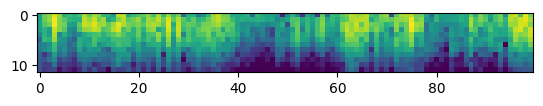

In [10]:
test_img = data['spectrogram'][0].squeeze()
plt.imshow(test_img)

In [12]:
#取奇异值（data_val是一个奇异值的一维数组）
data_vec1, data_val, data_vec2 = np.linalg.svd(test_img)
#将奇异值换成对角矩阵
data_val_mat = np.diag(data_val)

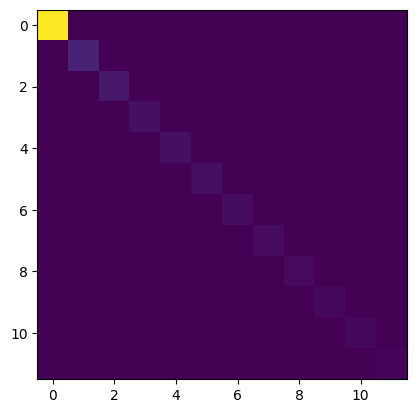

In [15]:
plt.imshow(data_val_mat)

In [ ]:
def max(n):
    data_val_any = np.diag(data_val[: n])
    mat_new_any = data_vec1[:, 0:n]@data_val_any@data_vec2[0:n, :]
    plt.imshow(mat_new_any)

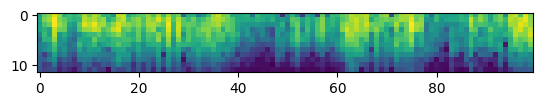

In [17]:
#选取最大的10个值
mat_10_max = data_vec1[:,:10]@data_val_mat[0:10, 0:10]@data_vec2[:10, :]
plt.imshow(mat_10_max)

original size:1200
compress size:113


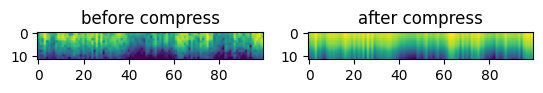

In [29]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
def pic_compress(k, pic_array):
    u, sigma, vt = np.linalg.svd(pic_array)
    sig = np.eye(k) * sigma[: k]
    new_pic = np.dot(np.dot(u[:, :k], sig), vt[:k, :])  # 还原图像
    size = u.shape[0] * k + sig.shape[0] * sig.shape[1] + k * vt.shape[1]  # 压缩后大小
    return new_pic, size

ori_img = test_img
new_img, size = pic_compress(1, ori_img) 
print("original size:" + str(ori_img.shape[0] * ori_img.shape[1])) 
print("compress size:" + str(size)) 
fig, ax = plt.subplots(1, 2) 
ax[0].imshow(ori_img) 
ax[0].set_title("before compress") 
ax[1].imshow(new_img) 
ax[1].set_title("after compress") 
plt.show()

In [3]:
X = data['spectrogram']
X = X.reshape(*X.shape[:-2], -1)
print(X.shape)

(36200, 1200)


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128) 
X_reduced = pca.fit_transform(X)	# 压缩
X_recovered = pca.inverse_transform(X_reduced)	# 重构

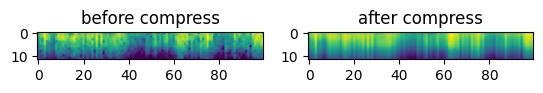

In [7]:
fig, ax = plt.subplots(1, 2) 
ax[0].imshow(X[0].reshape(12, 100)) 
ax[0].set_title("before compress") 
ax[1].imshow(X_recovered[0].reshape(12, 100)) 
ax[1].set_title("after compress") 
plt.show()